<a href="https://colab.research.google.com/github/ranshull/DRUG_DRUG-INTERACTION/blob/main/progress_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
# Step 1: Load Data


In [2]:
file_path = "/content/drive/MyDrive/Colab Notebooks/chem_similarity.csv"  # Update with your actual file path
df = pd.read_csv(file_path, index_col=0)  # Load data with drug IDs as index

In [ ]:
df.head()

,DB00006,DB00007,DB00014,DB00027,DB00035,DB00050,DB00067,DB00080,DB00091,DB00093,...,DB16351,DB16353,DB16390,DB16397,DB16400,DB16403,DB16404,DB16406,DB16407,DB16408
DB00006,0.000000,0.641350,0.608000,0.524017,0.830409,0.619658,0.813559,0.561702,0.461988,0.637427,...,0.497462,0.463203,0.513208,0.261062,0.455000,0.440529,0.454023,0.424354,0.288793,0.442149
DB00007,0.641350,0.000000,0.945148,0.758621,0.603448,0.766129,0.596639,0.710843,0.373333,0.461207,...,0.393701,0.538760,0.697417,0.354331,0.372549,0.368794,0.350649,0.545139,0.437751,0.511111
DB00014,0.608000,0.945148,0.000000,0.718367,0.571429,0.727969,0.565737,0.694981,0.352941,0.436735,...,0.379699,0.518519,0.683274,0.362595,0.364662,0.361775,0.331967,0.521595,0.437984,0.503571
DB00027,0.524017,0.758621,0.718367,0.000000,0.469027,0.672269,0.524664,0.754545,0.401042,0.525510,...,0.341880,0.637615,0.578947,0.413953,0.409091,0.300752,0.283019,0.511194,0.382609,0.466135
DB00035,0.830409,0.603448,0.571429,0.469027,0.000000,0.608889,0.888199,0.502146,0.465409,0.777027,...,0.510870,0.500000,0.476923,0.300971,0.481081,0.441860,0.484277,0.424710,0.281818,0.418803


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


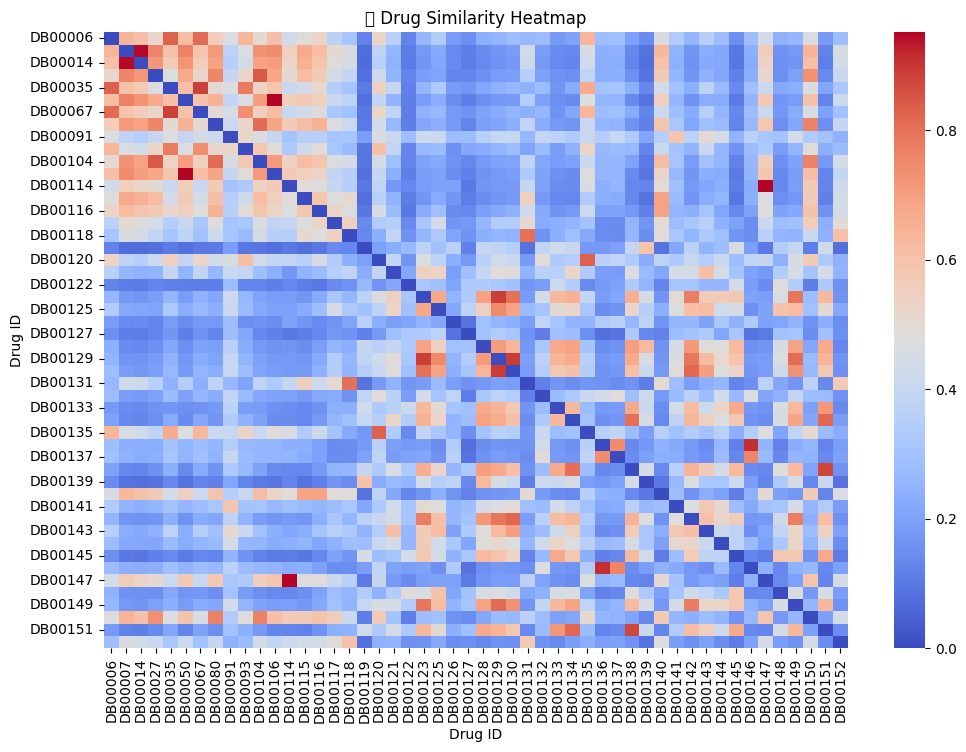

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset (optional for better visualization)
subset = df.iloc[:50, :50]  # First 50 drugs

plt.figure(figsize=(12, 8))
sns.heatmap(subset, cmap="coolwarm", annot=False)
plt.title("🔬 Drug Similarity Heatmap")
plt.xlabel("Drug ID")
plt.ylabel("Drug ID")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


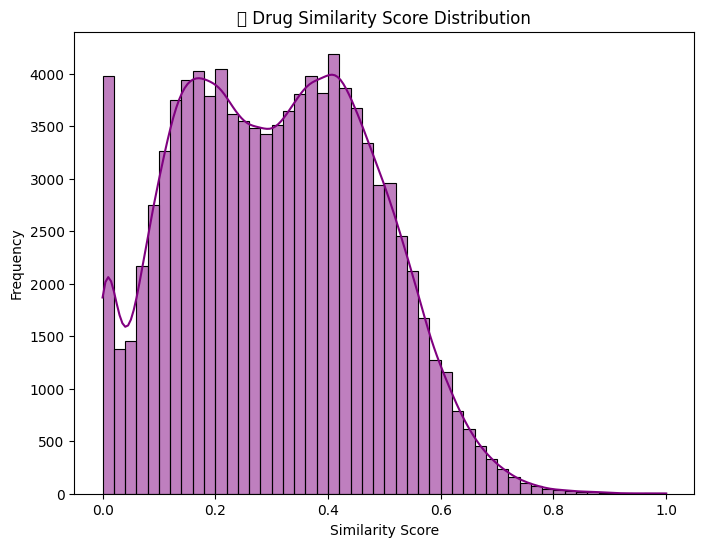

In [9]:


# Sample only 100,000 similarity values instead of all (adjust as needed)
sample_data = np.random.choice(df.values.flatten(), size=100000, replace=False)

plt.figure(figsize=(8, 6))
sns.histplot(sample_data, bins=50, color="purple", kde=True)
plt.title("📊 Drug Similarity Score Distribution")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


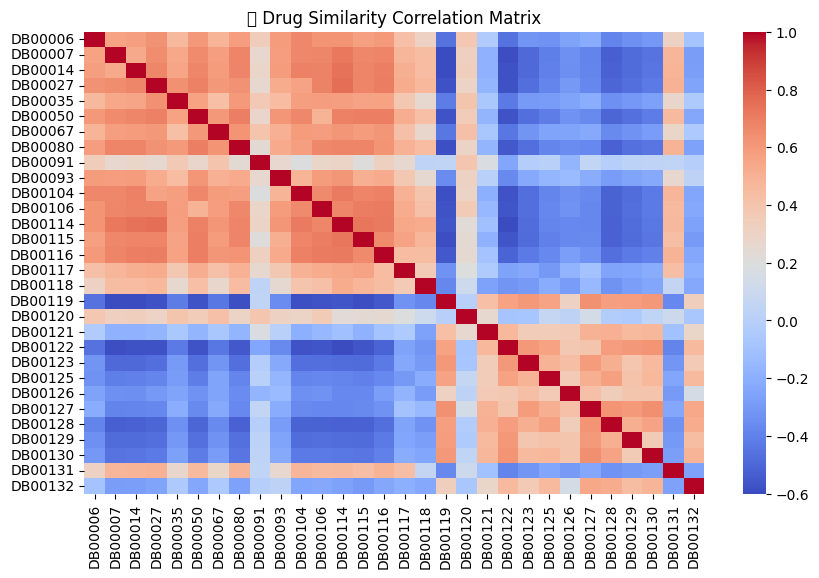

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:30, :30].corr(), cmap="coolwarm", annot=False)
plt.title("🔬 Drug Similarity Correlation Matrix")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


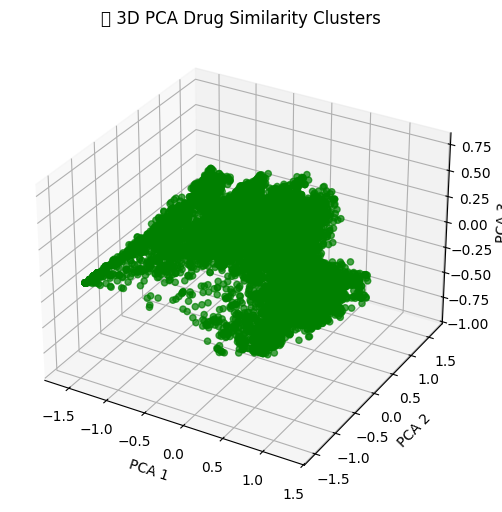

In [7]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Reduce dimensions to 3D for visualization
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df.iloc[:, :50])  # First 50 drugs

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c="green", alpha=0.7)
ax.set_title("🧬 3D PCA Drug Similarity Clusters")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.show()


In [ ]:


# Convert drug IDs to strings
df.index = df.index.astype(str)
df.columns = df.columns.astype(str)

# Strip whitespace (if any)
df.index = df.index.str.strip()
df.columns = df.columns.str.strip()

# Check if DB00007 exists
print("DB00007" in df.index)  # Should return True
print("DB00007" in df.columns)  # Should return True


True
True


In [ ]:
similarities = df.loc["DB00007"]
print(similarities)


DB00006    0.641350
DB00007    0.000000
DB00014    0.945148
DB00027    0.758621
DB00035    0.603448
             ...   
DB16403    0.368794
DB16404    0.350649
DB16406    0.545139
DB16407    0.437751
DB16408    0.511111
Name: DB00007, Length: 11168, dtype: float64


In [ ]:
top_similar = df.loc["DB00007"].sort_values(ascending=False)[1:4]  # Exclude itself (0.0 similarity)
print(top_similar)


DB11510    0.973913
DB06825    0.973913
DB00666    0.957265
Name: DB00007, dtype: float64


In [ ]:
import joblib

In [ ]:
pip install shap

In [ ]:
import pandas as pd
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor



# Ensure all IDs are strings
df.index = df.index.astype(str)
df.columns = df.columns.astype(str)
df.index = df.index.str.strip()
df.columns = df.columns.str.strip()

# Select a drug (example: "DB00007") and its similarities
drug_id = "DB00007"
y = df.loc[drug_id]  # Target similarity values
X = df.drop(drug_id, axis=0)  # Remove the drug itself from features

# Convert dataframe to numpy (avoid shape mismatch)
X = X.to_numpy()
y = y.drop(drug_id).to_numpy()


In [ ]:
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X, y)

# Save Model as a .pkl File
joblib.dump(model, "drug_similarity_model.pkl")
print("✅ Model saved as 'drug_similarity_model.pkl'")

# Load & Test Model
loaded_model = joblib.load("drug_similarity_model.pkl")
print("✅ Model loaded successfully. Ready for predictions!")

✅ Model saved as 'drug_similarity_model.pkl'
✅ Model loaded successfully. Ready for predictions!


100%|===================| 11150/11167 [03:42<00:00]       

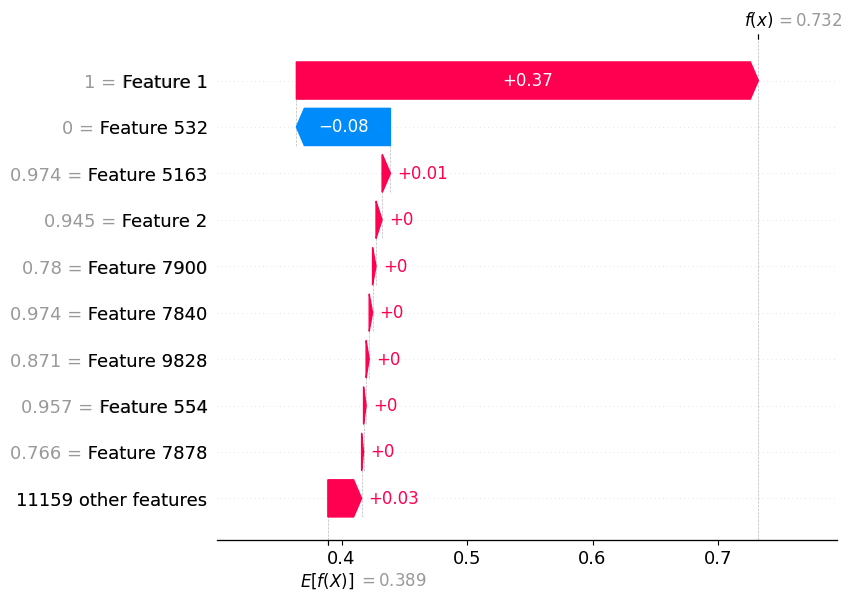

In [ ]:
# Train a model to "predict" similarity (treating it as a regression problem)
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X, y)

# Explain model predictions using SHAP
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Plot Explanation for the Most Similar Drug
most_similar_index = np.argmax(y)  # Get most similar drug's index
shap.waterfall_plot(shap_values[most_similar_index])  # Show feature contributions


In [ ]:
pip install joblib

In [ ]:
most_similar_index = np.argmax(y)
most_similar_drug = df.index[most_similar_index]

# Get SHAP explanation for why this drug is similar
shap_importance = shap_values[most_similar_index].values

# Rank top influencing drugs
top_features = np.argsort(-np.abs(shap_importance))[:5]  # Top 5 contributing drugs
top_drugs = df.index[top_features]
top_contributions = shap_importance[top_features]

# Generate text explanation
explanation = f"🔹 **Explanation for why {drug_id} is most similar to {most_similar_drug}:**\n\n"
explanation += f"📌 The similarity score between **{drug_id} and {most_similar_drug}** is **{y[most_similar_index]:.3f}**.\n"
explanation += "📊 The key contributing drugs that influenced this similarity are:\n"

for i in range(len(top_drugs)):
    sign = "increased" if top_contributions[i] > 0 else "decreased"
    explanation += f"   - **{top_drugs[i]}** ({sign} similarity by {abs(top_contributions[i]):.3f})\n"

explanation += "\n🧐 This means that the presence of these similar drugs in the dataset strongly influenced the prediction, making **" \
               f"{most_similar_drug}** the most similar drug to **{drug_id}**."

# Print the explanation
print(explanation)

🔹 **Explanation for why DB00007 is most similar to DB00643:**

📌 The similarity score between **DB00007 and DB00643** is **1.000**.
📊 The key contributing drugs that influenced this similarity are:
   - **DB00007** (increased similarity by 0.368)
   - **DB00644** (decreased similarity by 0.075)
   - **DB06825** (increased similarity by 0.007)
   - **DB00014** (increased similarity by 0.005)
   - **DB11613** (increased similarity by 0.003)

🧐 This means that the presence of these similar drugs in the dataset strongly influenced the prediction, making **DB00643** the most similar drug to **DB00007**.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import spearmanr

# Generate predictions using the trained model
y_pred = model.predict(X)

# Compute metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
spearman_corr, _ = spearmanr(y, y_pred)

# Display results
print(f"🔹 **Model Evaluation Metrics:**")
print(f"📌 Mean Squared Error (MSE): {mse:.4f}")
print(f"📌 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📌 R² Score: {r2:.4f}")
print(f"📌 Spearman Rank Correlation: {spearman_corr:.4f}")


🔹 **Model Evaluation Metrics:**
📌 Mean Squared Error (MSE): 0.0000
📌 Mean Absolute Error (MAE): 0.0001
📌 R² Score: 0.9998
📌 Spearman Rank Correlation: 1.0000


In [ ]:
import pandas as pd
import shap
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 🔹 Step 1: Load the Drug Similarity Dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/chem_similarity.csv"
df = pd.read_csv(file_path, index_col=0)

# Ensure all IDs are strings
df.index = df.index.astype(str).str.strip()
df.columns = df.columns.astype(str).str.strip()

# 🔹 Step 2: Select a Drug (Example: "DB00007") & Prepare Data
drug_id = "DB00007"
y = df.loc[drug_id]  # Target similarity values
X = df.drop(drug_id, axis=0)  # Remove the drug itself from features

# Convert DataFrame to numpy (avoid shape mismatch)
X = X.to_numpy()
y = y.drop(drug_id).to_numpy()

# 🔹 Step 3: Split Data for Training & Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Step 4: Train XGBoost Model
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=6)
model.fit(X_train, y_train)

# 🔹 Step 5: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Model Performance:")
print(f"📌 Mean Squared Error (MSE): {mse:.4f}")
print(f"📌 R² Score: {r2:.4f}")

# 🔹 Step 6: Explainability with SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# 🔹 Step 7: Plot SHAP Summary
plt.figure(figsize=(8, 6))
shap.summary_plot(shap_values, X_test)

# 🔹 Step 8: Save the XGBoost Model
model_path = "/content/drive/MyDrive/Colab Notebooks/drug_similarity_xgb.pkl"
import joblib
joblib.dump(model, model_path)
print(f"✅ Model saved as {model_path}")


✅ Model Performance:
📌 Mean Squared Error (MSE): 0.0000
📌 R² Score: 0.9997


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 🔹 Step 1: Load the Drug Similarity Dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/chem_similarity.csv"
df = pd.read_csv(file_path, index_col=0)

# Ensure all IDs are strings
df.index = df.index.astype(str).str.strip()
df.columns = df.columns.astype(str).str.strip()

# 🔹 Step 2: Select a Drug (Example: "DB00007") & Prepare Data
drug_id = "DB00007"
y = df.loc[drug_id]  # Target similarity values
X = df.drop(drug_id, axis=0)  # Remove the drug itself from features

# Convert DataFrame to numpy (avoid shape mismatch)
X = X.to_numpy()
y = y.drop(drug_id).to_numpy()

# 🔹 Step 3: Split Data for Training & Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Step 4: Train KNN Model
knn_model = KNeighborsRegressor(n_neighbors=5, metric='euclidean')  # Using Euclidean distance
knn_model.fit(X_train, y_train)

# 🔹 Step 5: Model Evaluation
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Model Performance:")
print(f"📌 Mean Squared Error (MSE): {mse:.4f}")
print(f"📌 R² Score: {r2:.4f}")

# 🔹 Step 6: Save the KNN Model
model_path = "/content/drive/MyDrive/Colab Notebooks/drug_similarity_knn.pkl"
joblib.dump(knn_model, model_path)
print(f"✅ Model saved as {model_path}")


✅ Model Performance:
📌 Mean Squared Error (MSE): 0.0003
📌 R² Score: 0.9915
✅ Model saved as /content/drive/MyDrive/Colab Notebooks/drug_similarity_knn.pkl


--------------------------------------------------------------------------------

In [ ]:
pip install pubchempy

  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13819 sha256=404505e0bfc0a690d0ab4ee18b1fc888027461856bae18b2cc2c964592ab9021
  Stored in directory: /root/.cache/pip/wheels/8b/e3/6c/3385b2db08b0985a87f5b117f98d0cb61a3ae3ca3bcbbd8307
Successfully built pubchempy


In [ ]:
pip install shap

In [ ]:
# Install pubchempy (if not installed)
!pip install pubchempy

import pubchempy as pcp

def get_drug_info(identifier):
    """
    Fetch drug information using a name, DrugBank ID, or PubChem CID.
    """
    try:
        if identifier.isdigit():  # If input is numeric, treat as CID
            compound = pcp.Compound.from_cid(int(identifier))
        else:  # Otherwise, search by name or DrugBank ID
            results = pcp.get_compounds(identifier, 'name')
            if not results:
                print(f"No results found for: {identifier}")
                return None
            compound = results[0]

        # Extract external identifiers (including DrugBank ID if available)
        drugbank_id = None
        if compound.synonyms:
            for synonym in compound.synonyms:
                if synonym.startswith("DB"):  # DrugBank IDs typically start with "DB"
                    drugbank_id = synonym
                    break  # Stop once found

        # Extract relevant details
        drug_info = {
            "Name": compound.iupac_name,
            "Molecular Formula": compound.molecular_formula,
            "Molecular Weight": compound.molecular_weight,
            "Canonical SMILES": compound.canonical_smiles,
            "InChIKey": compound.inchikey,
            "PubChem CID": compound.cid,
            "DrugBank ID": drugbank_id if drugbank_id else "Not Found"
        }

        return drug_info

    except Exception as e:
        print(f"Error fetching drug info: {e}")
        return None

# Run the function in Colab
identifier = input("Enter Drug Name, DrugBank ID, or PubChem CID: ")
drug_info = get_drug_info(identifier)

if drug_info:
    print("\n**Drug Information:**")
    for key, value in drug_info.items():
        print(f"{key}: {value}")
else:
    print("No data found.")


Enter Drug Name, DrugBank ID, or PubChem CID: DB00006

**Drug Information:**
Name: (2S)-2-[[(2S)-2-[[(2S)-2-[[(2S)-2-[[(2S)-1-[(2S,3S)-2-[[(2S)-2-[[(2S)-2-[[(2S)-2-[[(2S)-2-[[2-[[(2S)-4-amino-2-[[2-[[2-[[2-[[2-[[(2S)-1-[(2S)-2-[[(2S)-1-[(2R)-2-amino-3-phenylpropanoyl]pyrrolidine-2-carbonyl]amino]-5-carbamimidamidopentanoyl]pyrrolidine-2-carbonyl]amino]acetyl]amino]acetyl]amino]acetyl]amino]acetyl]amino]-4-oxobutanoyl]amino]acetyl]amino]-3-carboxypropanoyl]amino]-3-phenylpropanoyl]amino]-4-carboxybutanoyl]amino]-4-carboxybutanoyl]amino]-3-methylpentanoyl]pyrrolidine-2-carbonyl]amino]-4-carboxybutanoyl]amino]-4-carboxybutanoyl]amino]-3-(4-hydroxyphenyl)propanoyl]amino]-4-methylpentanoic acid
Molecular Formula: C98H138N24O33
Molecular Weight: 2180.3
Canonical SMILES: CCC(C)C(C(=O)N1CCCC1C(=O)NC(CCC(=O)O)C(=O)NC(CCC(=O)O)C(=O)NC(CC2=CC=C(C=C2)O)C(=O)NC(CC(C)C)C(=O)O)NC(=O)C(CCC(=O)O)NC(=O)C(CCC(=O)O)NC(=O)C(CC3=CC=CC=C3)NC(=O)C(CC(=O)O)NC(=O)CNC(=O)C(CC(=O)N)NC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(

In [ ]:

import pubchempy as pcp
import requests

def get_pubchem_drug_name(identifier):
    """Fetch drug name from PubChem."""
    try:
        results = pcp.get_compounds(identifier, 'name')
        if results:
            compound = results[0]
            if compound.synonyms:
                return compound.synonyms[0]  # First synonym is usually the common name
            return compound.iupac_name  # Fallback to IUPAC if no synonym
    except Exception as e:
        print(f"PubChem lookup failed: {e}")
    return None

def get_chembl_drug_name(chembl_id):
    """Fetch drug name from ChEMBL using REST API."""
    try:
        url = f"https://www.ebi.ac.uk/chembl/api/data/molecule/{chembl_id}.json"
        response = requests.get(url, timeout=5)
        if response.status_code == 200:
            data = response.json()
            return data.get("pref_name", None)  # Preferred name
    except Exception as e:
        print(f"ChEMBL lookup failed: {e}")
    return None

def get_drug_name(identifier):
    """Try PubChem first, then ChEMBL if PubChem fails."""
    drug_name = get_pubchem_drug_name(identifier)
    if not drug_name:
        drug_name = get_chembl_drug_name(identifier)  # Try ChEMBL if PubChem fails
    return drug_name if drug_name else "Unknown"

# Example: Fetch drug name for a given identifier
identifier = "DB00006"  # Replace with actual drug name, DrugBank ID, or PubChem CID
drug_name = get_drug_name(identifier)
print(f"✅ Drug Name: {drug_name}")


✅ Drug Name: Bivalirudin
